In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

ccnorder = ['RDON', 'DON', 'DIN', 'Bp', 'Bh',  ]
ccnpalette = [RDONCOLOR,  DONCOLOR, DINCOLOR, PCOLOR, HCOLOR,]

cccpalette = [RDOCCOLOR, DOCCOLOR, DICCOLOR, PCOLOR, HCOLOR,]
cccorder = ['RDOC', 'DOC', 'DIC', 'Bp[C]', 'Bh[C]',]

ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [5]:
refdf = pd.read_csv('prelim bottle.csv')


In [6]:
dpath = r'C:\Users\wosnat\Documents\GitHub\recycle_model\res\de1'
import glob
res_glob_pattern = '*_df.csv.gz'
sum_glob_pattern = '*_sum.csv.gz'
glob.glob('*_df.csv.gz')

sum_df = pd.concat ( [ 
    pd.read_csv(f) for f in glob.glob(os.path.join(dpath,sum_glob_pattern ))
] )



In [7]:
def _read(f):
    try:
        df = pd.read_csv(f)    
        df['run_id'] = os.path.basename(f).replace('_df.csv.gz', '')
        return df
    except:
        print(f)
        return None
dfs = [ _read(f) for f in glob.glob(os.path.join(dpath,res_glob_pattern ))] 
df = pd.concat ( [ d for d in dfs if d is not None])

C:\Users\wosnat\Documents\GitHub\recycle_model\res\de1\de_h-843737160271977226_df.csv.gz


In [8]:
sum_df['error'] = sum_df.h_err + sum_df.p_err

In [9]:
sum_df.head()

,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,E^O_p,E^I_p,E^O_h,...,O_h,epsilon,VTmax,KT_h,omega,run_id,status,h_err,p_err,error
0,0,2.389476e-06,9.503515e-06,0.516846,0.670082,6.625,6.625,0.000007,0.0,0.0,...,1,0.000009,0.000091,0.250272,0.759808,de_h-1000037321688616216,0,3996.056912,1604.798768,5600.855680
0,0,2.273850e-07,1.083628e-06,0.496828,0.629033,6.625,6.625,0.000008,0.0,0.0,...,1,0.000005,0.000069,0.250272,0.759781,de_h-1003234812744863186,0,3988.641601,1604.660167,5593.301768
0,0,2.631585e-06,6.723365e-07,0.595999,0.353924,6.625,6.625,0.000009,0.0,0.0,...,1,0.000006,0.000042,0.250272,0.426956,de_h-1003600340430498967,0,4076.399822,1491.861420,5568.261242
0,0,8.916094e-06,1.904304e-06,0.799335,0.267197,6.625,6.625,0.000006,0.0,0.0,...,1,0.000004,0.000016,0.250272,0.276390,de_h-1004700782046925531,0,3974.173287,1600.874259,5575.047546
0,0,1.587886e-06,1.096001e-06,0.623258,0.696565,6.625,6.625,0.000004,0.0,0.0,...,1,0.000002,0.000208,0.250272,0.198850,de_h-1007391539205323316,0,3199.970837,514.538726,3714.509563


In [10]:
sum_df.shape

C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

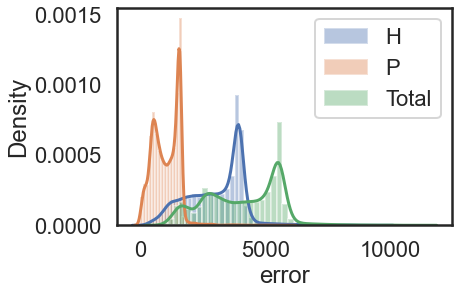

In [11]:
sns.distplot(sum_df.h_err, label='H')
sns.distplot(sum_df.p_err, label='P')
sns.distplot(sum_df.error, label='Total')
plt.legend()


In [12]:
sum_df.nsmallest(columns='error', n=10)

,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,E^O_p,E^I_p,E^O_h,...,O_h,epsilon,VTmax,KT_h,omega,run_id,status,h_err,p_err,error
0,0,2.149053e-07,5.730569e-07,0.494539,0.680110,6.625,6.625,0.000001,0.0,0.0,...,1,0.000004,0.000238,0.250272,0.662070,de_h-5731020692634102405,0,865.604961,24.000912,889.605872
0,0,3.619606e-07,5.522234e-07,0.620042,0.675310,6.625,6.625,0.000002,0.0,0.0,...,1,0.000003,0.000107,0.250272,0.847947,de_h-3109580870330511485,0,892.877558,55.926907,948.804466
0,0,2.775007e-07,6.850945e-07,0.655000,0.416532,6.625,6.625,0.000001,0.0,0.0,...,1,0.000008,0.000219,0.250272,0.518936,de_h-410181566262496769,0,933.840934,25.379050,959.219984
0,0,3.024487e-07,9.272712e-07,0.726575,0.720565,6.625,6.625,0.000001,0.0,0.0,...,1,0.000009,0.000014,0.250272,0.714608,de_h-1605834564472342225,0,414.319146,547.555616,961.874763
0,0,2.812124e-07,9.382877e-07,0.640125,0.689941,6.625,6.625,0.000002,0.0,0.0,...,1,0.000005,0.000054,0.250272,0.652688,de_h-8070691077302641506,0,812.768544,153.969726,966.738270
0,0,3.662708e-07,7.328470e-07,0.659624,0.820147,6.625,6.625,0.000002,0.0,0.0,...,1,0.000009,0.000207,0.250272,0.679903,de_h8289499028511974214,0,918.630187,66.838943,985.469130
0,0,2.233230e-07,1.027605e-06,0.666979,0.826227,6.625,6.625,0.000002,0.0,0.0,...,1,0.000008,0.000224,0.250272,0.280866,de_h-6205907785455399266,0,954.403488,34.801902,989.205390
0,0,2.321185e-07,6.659631e-07,0.494821,0.634670,6.625,6.625,0.000002,0.0,0.0,...,1,0.000009,0.000023,0.250272,0.386120,de_h-8273131902564899996,0,899.397884,102.377078,1001.774962
0,0,3.754625e-07,5.561971e-07,0.505431,0.686256,6.625,6.625,0.000002,0.0,0.0,...,1,0.000010,0.000189,0.250272,0.572666,de_h-1259493759260641337,0,959.463856,47.237100,1006.700956
0,0,1.721881e-07,8.083706e-07,0.571338,0.709697,6.625,6.625,0.000001,0.0,0.0,...,1,0.000010,0.000204,0.250272,0.732033,de_h258035994305631515,0,986.586443,25.496647,1012.083090


In [13]:
df.drop(columns=['Unnamed: 0',], inplace=True)

In [14]:
df.head()

,Bp,Bh,DON,RDON,DIN,DOC,RDOC,DIC,ROS,t,...,deathh,exudationOp,exudationIp,exudationOh,exudationIh,Treleasep,Tbreakdownh,Bp[C],Bh[C],run_id
0,1.100000,44.000000,20.000000,0.000000,100.000000,132.500000,0.000000,3000.000000,0.000000,0.000000,...,0.000105,7.534272e-06,0.0,0.0,0.000203,9.669578e-06,0.000000e+00,7.287500,291.500000,de_h-1000037321688616216
1,0.197863,27.356005,0.048004,5.665521,131.832607,0.008536,37.534075,3211.200514,0.000176,157319.999971,...,0.000065,1.355227e-06,0.0,0.0,0.000126,1.739315e-06,1.740298e-06,1.310839,181.233536,de_h-1000037321688616216
2,0.011591,6.778807,0.022789,8.773746,149.513066,0.008193,58.126068,3328.166849,0.000042,417540.000010,...,0.000016,7.939176e-08,0.0,0.0,0.000031,1.018924e-07,1.021217e-07,0.076791,44.909599,de_h-1000037321688616216
3,0.001727,2.643511,0.018014,9.382444,153.054303,0.008130,62.158694,3351.595972,0.000016,592139.999981,...,0.000006,1.183054e-08,0.0,0.0,0.000012,1.518346e-08,1.527087e-08,0.011443,17.513261,de_h-1000037321688616216
4,0.000282,1.076201,0.016247,9.611820,154.395451,0.008107,63.678305,3360.469390,0.000006,758520.000029,...,0.000003,1.928249e-09,0.0,0.0,0.000005,2.474738e-09,2.509705e-09,0.001865,7.129834,de_h-1000037321688616216


In [15]:
df.columns

Index(['Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 't',
       'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp', 'limOCp', 'limINh',
       'limONh', 'limICh', 'limOCh', 'gross_uptakeINp', 'gross_uptakeONp',
       'gross_uptakeICp', 'gross_uptakeOCp', 'gross_uptakeINh',
       'gross_uptakeONh', 'gross_uptakeICh', 'gross_uptakeOCh',
       'actual_uptakeNp', 'actual_uptakeNh', 'overflowNp', 'overflowCp',
       'overflowNh', 'overflowCh', 'deathp', 'deathh', 'exudationOp',
       'exudationIp', 'exudationOh', 'exudationIh', 'Treleasep', 'Tbreakdownh',
       'Bp[C]', 'Bh[C]', 'run_id'],
      dtype='object')

In [16]:
mdf = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccxorder+ccnorder+cccorder)

In [17]:
lowest_ids = sum_df.nsmallest(columns='error', n=10)['run_id']

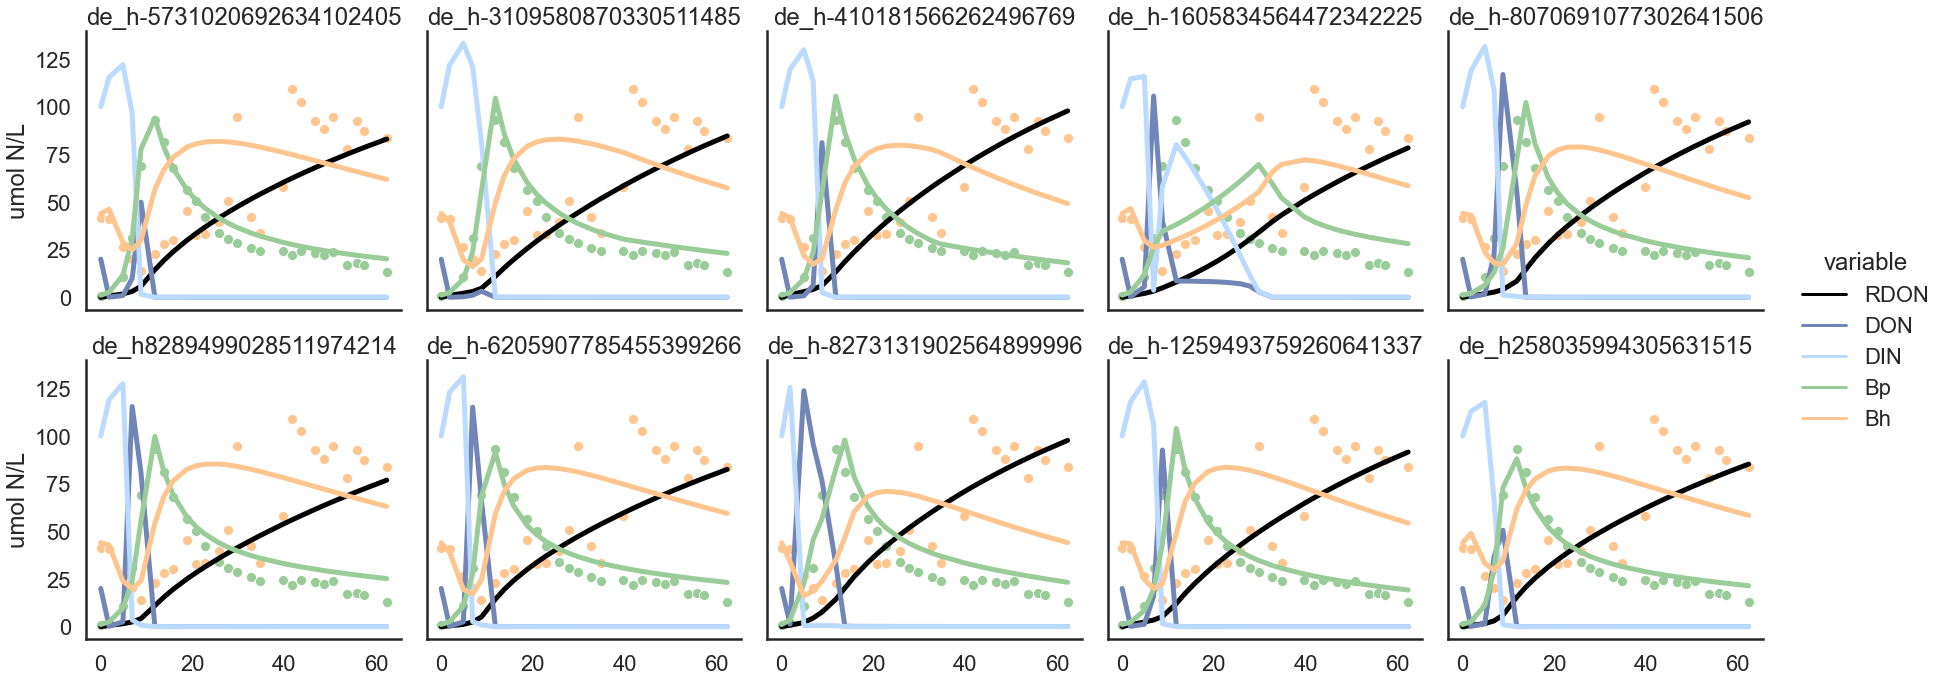

In [18]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



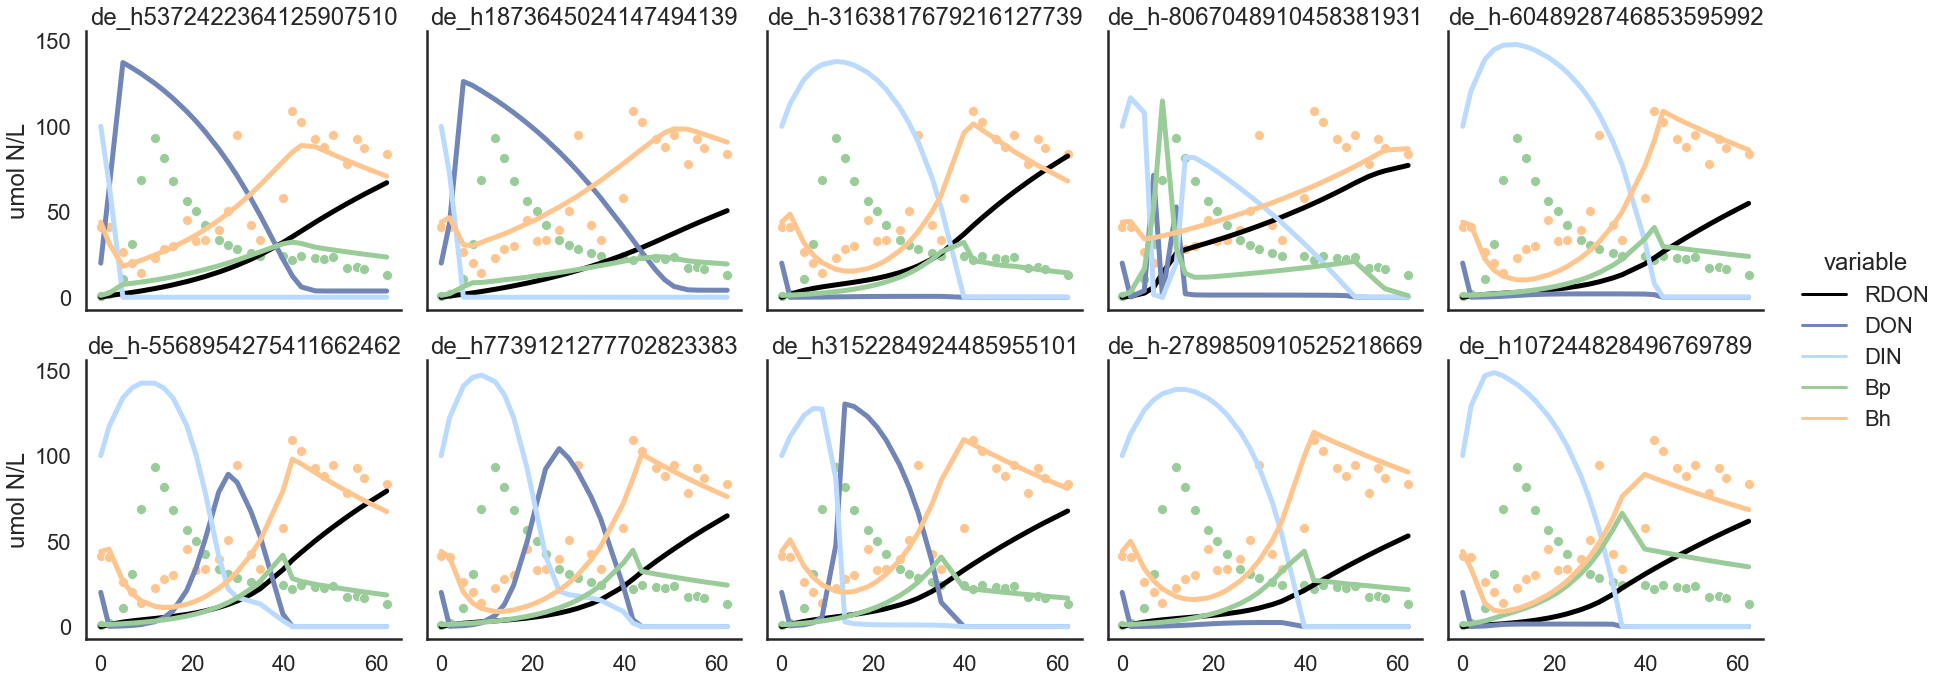

In [19]:
ids = list(sum_df.nsmallest(columns='h_err', n=10)['run_id'])
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



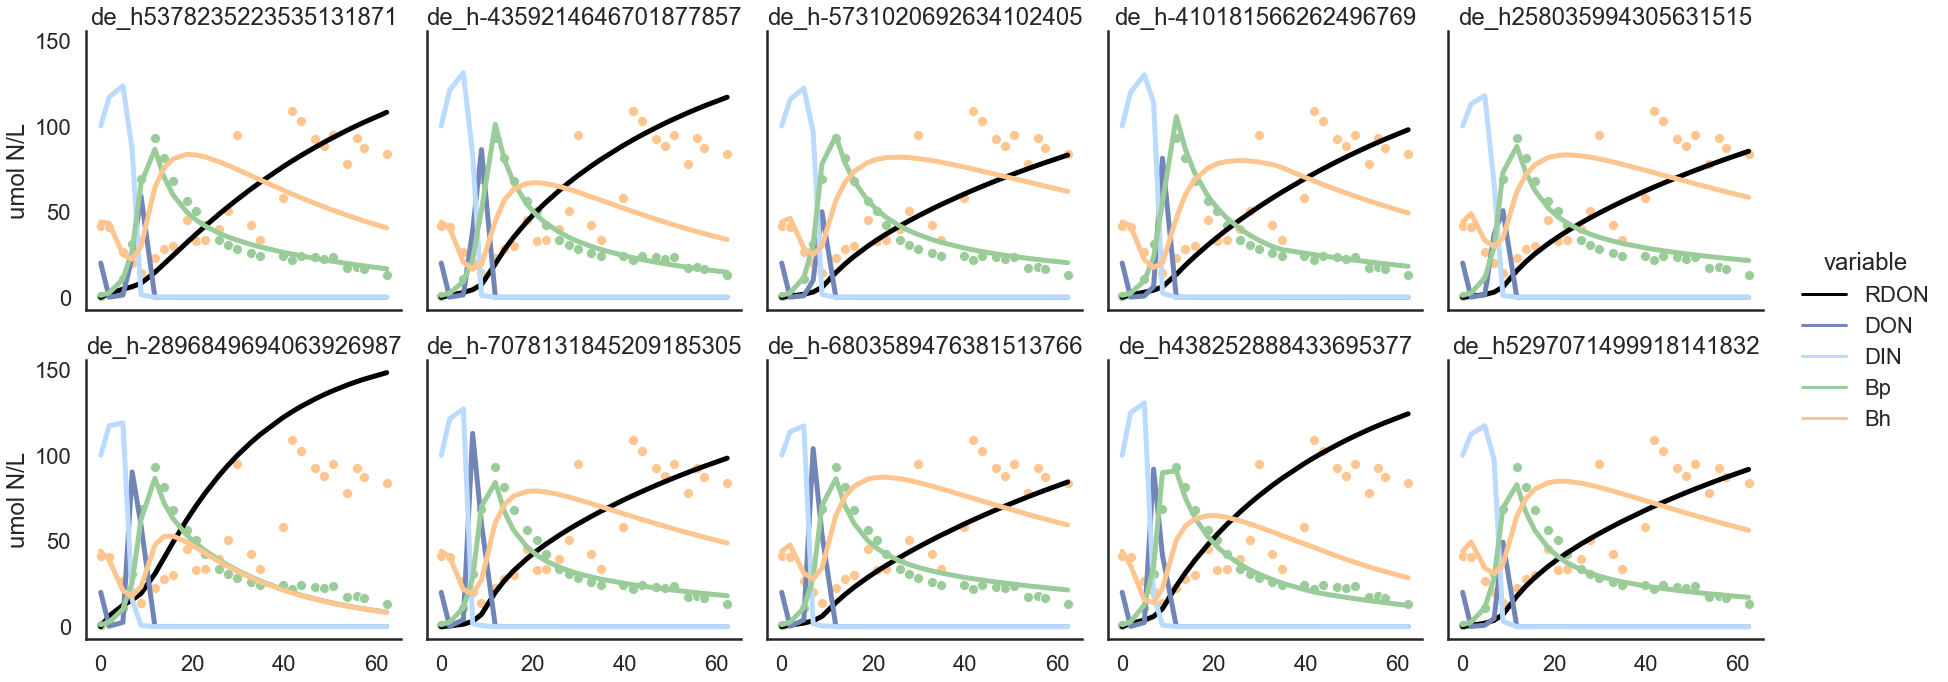

In [20]:
ids = list(sum_df.nsmallest(columns='p_err', n=10)['run_id'])
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [21]:
ids

['de_h5378235223535131871',
 'de_h-4359214646701877857',
 'de_h-5731020692634102405',
 'de_h-410181566262496769',
 'de_h258035994305631515',
 'de_h-2896849694063926987',
 'de_h-7078131845209185305',
 'de_h-6803589476381513766',
 'de_h438252888433695377',
 'de_h5297071499918141832']

In [22]:
sum_df.nlargest(10, 'error', )

,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,E^O_p,E^I_p,E^O_h,...,O_h,epsilon,VTmax,KT_h,omega,run_id,status,h_err,p_err,error
0,0,1.539882e-07,1.421618e-06,0.430152,0.846868,6.625,6.625,0.000005,0.0,0.0,...,1,0.000010,0.000005,0.250272,0.564930,de_h-76018823674143410,0,9598.888490,1571.850693,11170.739182
0,0,1.214507e-07,7.912240e-07,0.812284,0.720983,6.625,6.625,0.000006,0.0,0.0,...,1,0.000009,0.000067,0.250272,0.613550,de_h-9056002455877285170,0,9424.238789,1587.853433,11012.092221
0,0,2.870694e-07,5.866051e-07,0.600582,0.873869,6.625,6.625,0.000004,0.0,0.0,...,1,0.000008,0.000064,0.250272,0.834898,de_h4038022056479036025,0,9329.886865,1566.834926,10896.721790
0,0,2.144677e-07,2.224524e-06,0.702697,0.785702,6.625,6.625,0.000005,0.0,0.0,...,1,0.000004,0.000079,0.250272,0.542059,de_h2869822369935121646,0,8987.958172,1603.100320,10591.058492
0,0,3.185536e-07,1.030528e-06,0.781745,0.879683,6.625,6.625,0.000009,0.0,0.0,...,1,0.000002,0.000080,0.250272,0.247982,de_h2241318533119082272,0,8386.449848,1588.791396,9975.241244
0,0,4.058240e-07,1.040442e-06,0.728852,0.860339,6.625,6.625,0.000006,0.0,0.0,...,1,0.000010,0.000134,0.250272,0.760226,de_h5102330666527253088,0,8382.368574,1586.126550,9968.495124
0,0,1.311163e-07,1.344657e-06,0.649377,0.603457,6.625,6.625,0.000009,0.0,0.0,...,1,0.000007,0.000053,0.250272,0.584338,de_h-3919185837028040100,0,8405.463237,1552.294684,9957.757921
0,0,2.245044e-07,9.973170e-07,0.413282,0.828993,6.625,6.625,0.000005,0.0,0.0,...,1,0.000005,0.000076,0.250272,0.410559,de_h-3863098640690761306,0,8393.617422,1558.779829,9952.397251
0,0,2.587270e-07,7.522221e-07,0.445304,0.880045,6.625,6.625,0.000008,0.0,0.0,...,1,0.000004,0.000066,0.250272,0.257868,de_h5290823608867919764,0,8330.790337,1569.376579,9900.166916
0,0,3.045460e-07,1.935792e-06,0.869531,0.857828,6.625,6.625,0.000006,0.0,0.0,...,1,0.000007,0.000025,0.250272,0.196683,de_h-7517903334496938667,0,8258.749129,1598.368392,9857.117522


In [23]:
sum_df.nsmallest(columns='error', n=1).T

,0
Unnamed: 0,0
M_h,0.0
M_p,0.000001
gamma^D_p,0.494539
gamma^D_h,0.68011
R_p,6.625
R_h,6.625
E^O_p,0.000001
E^I_p,0.0
E^O_h,0.0


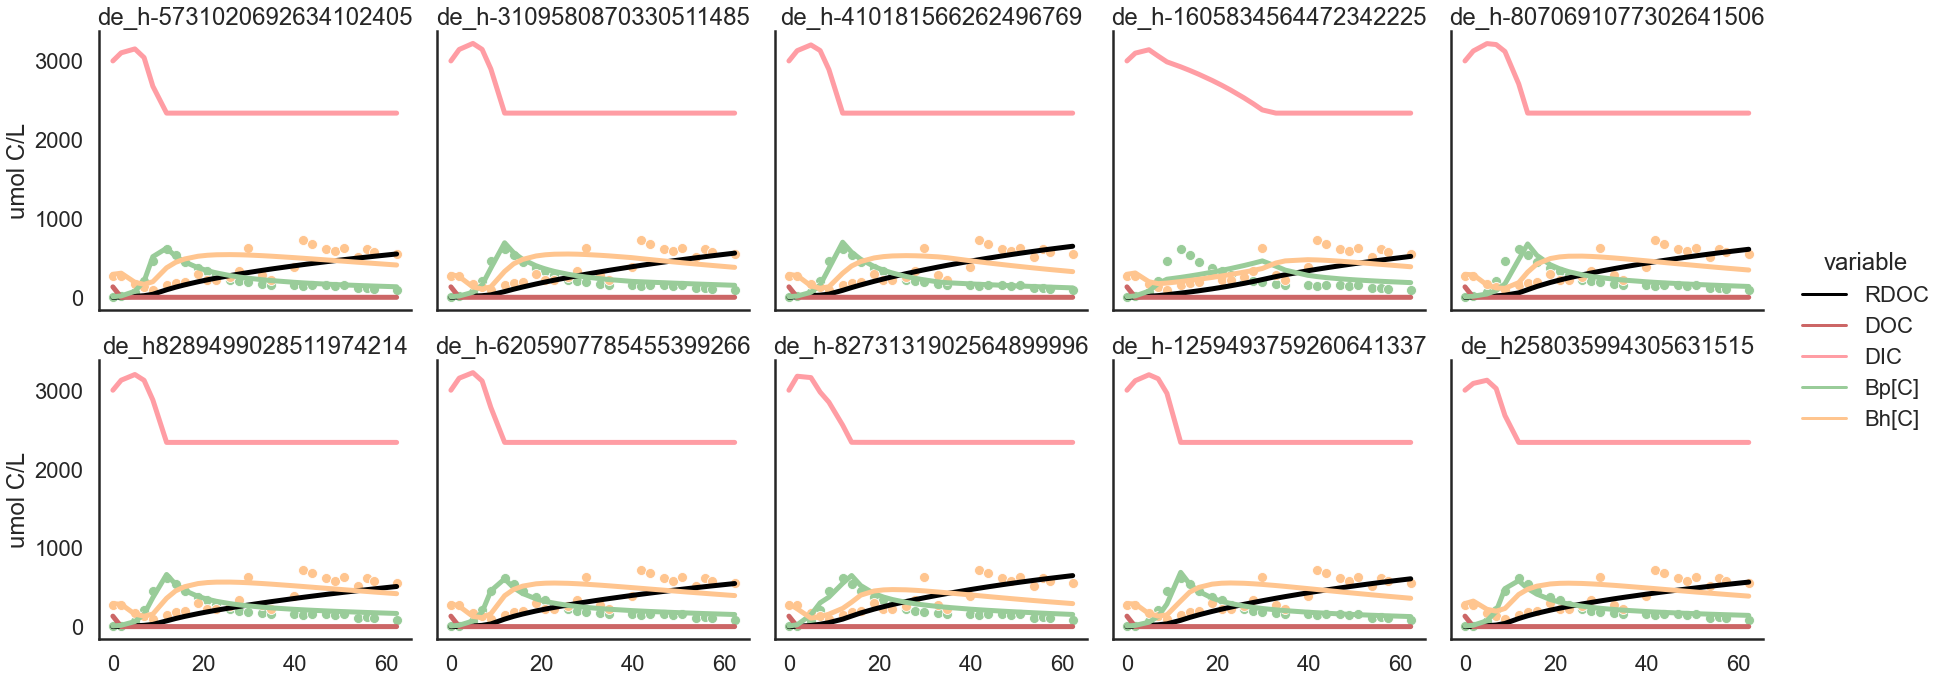

In [24]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(cccorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=cccorder, palette=cccpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol C/L')
g.set_titles(col_template='{col_name}',)



In [25]:
df.shape

In [26]:
refdf[['t', 'day']]

,t,day
0,0.000000e+00,0.000000
1,1.573200e+05,1.820833
2,4.175400e+05,4.832639
3,5.921400e+05,6.853472
4,7.585200e+05,8.779167
5,1.019820e+06,11.803472
6,1.189800e+06,13.770833
7,1.362900e+06,15.774306
8,1.617000e+06,18.715278
9,1.795200e+06,20.777778


In [27]:
df.columns

Index(['Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 't',
       'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp', 'limOCp', 'limINh',
       'limONh', 'limICh', 'limOCh', 'gross_uptakeINp', 'gross_uptakeONp',
       'gross_uptakeICp', 'gross_uptakeOCp', 'gross_uptakeINh',
       'gross_uptakeONh', 'gross_uptakeICh', 'gross_uptakeOCh',
       'actual_uptakeNp', 'actual_uptakeNh', 'overflowNp', 'overflowCp',
       'overflowNh', 'overflowCh', 'deathp', 'deathh', 'exudationOp',
       'exudationIp', 'exudationOh', 'exudationIh', 'Treleasep', 'Tbreakdownh',
       'Bp[C]', 'Bh[C]', 'run_id'],
      dtype='object')

In [28]:
df.t.unique()

array([      0.       ,  157319.9999712,  417540.0000096,  592139.9999808,
        758520.0000288, 1019819.999808 , 1189799.999712 , 1362900.000384 ,
       1617000.000192 , 1795200.000192 , 1965899.999808 , 2222220.000096 ,
       2401439.999616 , 2570220.000288 , 2827140.000192 , 3004260.000192 ,
       3431280.000096 , 3610739.999808 , 3777179.999904 , 4041480.000096 ,
       4211700.000192 , 4383960.000192 , 4645200.000096 , 4821179.999616 ,
       4955160.000096 , 5387160.000096 ])

In [29]:
df.day.unique()

array([ 0.        ,  1.82083333,  4.83263889,  6.85347222,  8.77916667,
       11.80347222, 13.77083333, 15.77430556, 18.71527778, 20.77777778,
       22.75347222, 25.72013889, 27.79444444, 29.74791667, 32.72152778,
       34.77152778, 39.71388889, 41.79097222, 43.71736111, 46.77638889,
       48.74652778, 50.74027778, 53.76388889, 55.80069444, 57.35138889,
       62.35138889])

In [30]:
#df.loc[np.isclose(df.day, [5,11,15,25,41,62] ,atol=1),'day']
df.loc[df.day.round(0).isin([ 5., 12., 16., 30., 44., 62.]), 'day'].unique()

array([ 4.83263889, 11.80347222, 15.77430556, 29.74791667, 43.71736111,
       62.35138889])

In [31]:
df.day.round(0).unique()

array([ 0.,  2.,  5.,  7.,  9., 12., 14., 16., 19., 21., 23., 26., 28.,
       30., 33., 35., 40., 42., 44., 47., 49., 51., 54., 56., 57., 62.])

In [32]:
import hdbscan


In [33]:
import umap

In [34]:
sample_cols = ['Bp', 'Bh', 'DON', 'DIN', 'RDON', 'DOC', 'DIC', 'RDOC']

sample_days = [ 5., 12., 16., 30., 44., 62.]

tdf = mdf.loc[mdf.day.round(0).isin(sample_days) & mdf.variable.isin(sample_cols)]

In [35]:
tdf['day'] = tdf.day.round(0)
X = tdf.pivot(index='run_id', columns=['variable', 'day'], values=['value'])

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
X

value              \
variable                                                 RDON               
day                                                      5.0         12.0   
run_id                                                                      
de_h-1000037321688616216                             8.773746    9.730674   
de_h-1003234812744863186                             0.900358    1.081078   
de_h-1003600340430498967                            67.347615  125.230685   
de_h-1004700782046925531                           138.841134  163.238380   
de_h-1007391539205323316                            28.181363   61.141175   
...                                                       ...         ...   
dis_P_OVERFLOW-P_EXUDATION_h644510531111007270      13.510541   55.196917   
dis_P_OVERFLOW-P_RECYCLING_h-7043233079797620124    14.659273   72.702506   
dis_P_OVERFLOW_h3333060461664002660                 12.884111   52.041398   
dis_P_RECYCLING-COMPETITION_h-8049985262632592722   14.281701   72.374453   
dis_P_RECYCLING_h-8446226290633779427               15.377786   71.567077   

                                                                           \
variable                                                                    
day                                                      16.0        30.0   
run_id                                                                      
de_h-1000037321688616216                             9.762927    9.768901   
de_h-1003234812744863186                             1.094031    1.098326   
de_h-1003600340430498967                           141.268141  161.156922   
de_h-1004700782046925531                           164.619874  164.996449   
de_h-1007391539205323316                            76.202539  113.817468   
...                                                       ...         ...   
dis_P_OVERFLOW-P_EXUDATION_h644510531111007270      74.643461  119.294044   
dis_P_OVERFLOW-P_RECYCLING_h-7043233079797620124    96.353588  139.390217   
dis_P_OVERFLOW_h3333060461664002660                 72.026841  117.974446   
dis_P_RECYCLING-COMPETITION_h-8049985262632592722   96.045436  139.236006   
dis_P_RECYCLING_h-8446226290633779427               94.081809  136.745423   

                                                                           \
variable                                                                    
day                                                      44.0        62.0   
run_id                                                                      
de_h-1000037321688616216                             9.768910    9.768910   
de_h-1003234812744863186                             1.098359    1.098359   
de_h-1003600340430498967                           164.388947  164.960863   
de_h-1004700782046925531                           164.998133  164.998141   
de_h-1007391539205323316                           135.470477  150.789324   
...                                                       ...         ...   
dis_P_OVERFLOW-P_EXUDATION_h644510531111007270     141.568853  154.952727   
dis_P_OVERFLOW-P_RECYCLING_h-7043233079797620124   154.862641  161.455105   
dis_P_OVERFLOW_h3333060461664002660                140.839910  154.553612   
dis_P_RECYCLING-COMPETITION_h-8049985262632592722  154.804437  161.439898   
dis_P_RECYCLING_h-8446226290633779427              153.184849  160.892021   

                                                                       \
variable                                                DON             
day                                                    5.0       12.0   
run_id                                                                  
de_h-1000037321688616216                           0.022789  0.015347   
de_h-1003234812744863186                           0.105515  0.026270   
de_h-1003600340430498967                           0.036448  0.031253   
de_h-1004700782046925531                           0.078970  0.078992   
de_h

In [37]:
reducer = umap.UMAP(random_state=42)
umap_embedding = reducer.fit_transform(X)

In [56]:
udf = pd.DataFrame(data=umap_embedding, columns=['UMAP1','UMAP2'])

In [57]:
udf['run_id'] = X.index

In [58]:
udf = pd.merge(udf, sum_df, on='run_id', how='left')

In [60]:
udf['logerror'] = np.log(udf['error'])

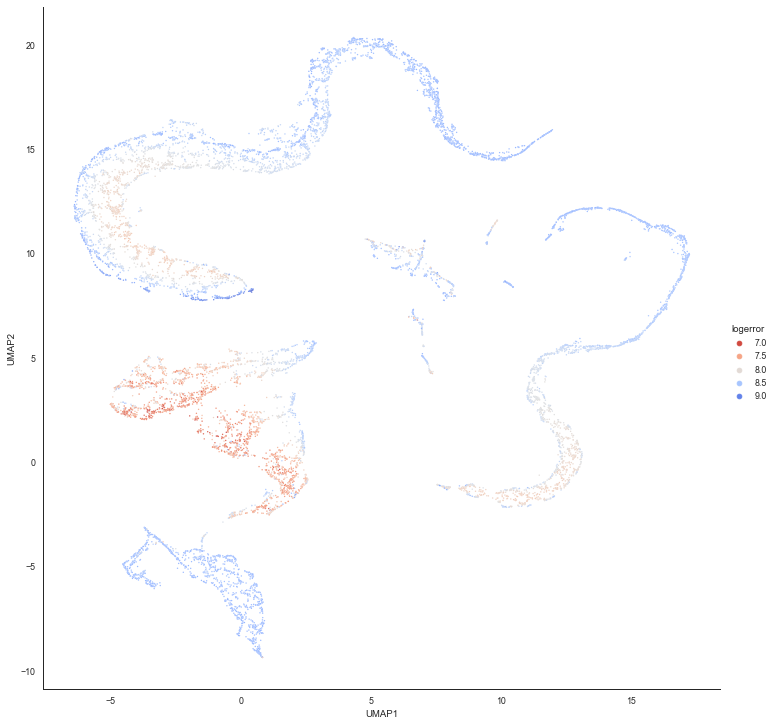

In [61]:
sns.set_context('paper')
sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='logerror', s=2, height=10, aspect=1, palette='coolwarm_r')

In [62]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=15)
clusterer.fit(X)


HDBSCAN(min_cluster_size=100, min_samples=15)

In [63]:
clusterer.labels_

array([2, 2, 4, ..., 3, 0, 0], dtype=int64)

In [64]:
clusterer.labels_.max()

4

In [65]:
(clusterer.labels_ < 0).sum()

1251

In [66]:
udf['cluster'] = clusterer.labels_

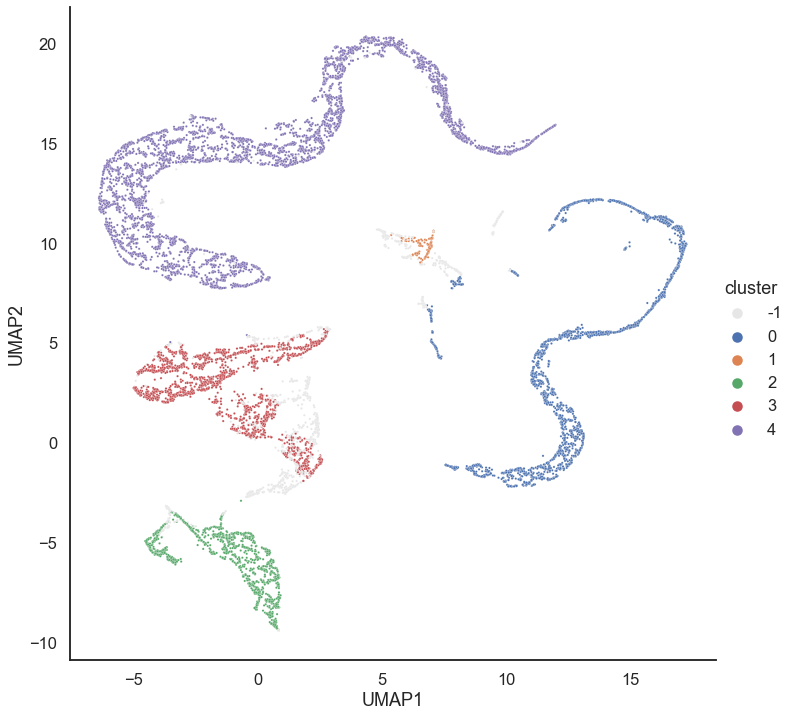

In [67]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')

<AxesSubplot:ylabel='$\\lambda$ value'>

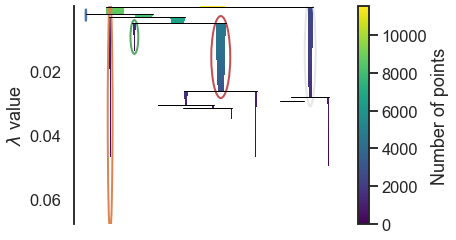

In [68]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=cpalette)

In [69]:
udf.groupby('cluster')['error'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
-1,1251.0,3593.377427,1409.785292,961.874763,2404.923983,3446.167331,4770.836874,10591.058492
0,2616.0,4178.653117,1081.631567,1108.240403,3139.576946,4237.058046,5276.926278,7058.496466
1,141.0,4315.361126,1406.269874,2437.598487,3139.145072,4174.614200,5083.763596,9227.282691
2,1150.0,5447.093238,304.508278,3014.870929,5446.213048,5544.848046,5590.803509,6166.631521
3,1866.0,2211.832891,897.655854,889.605872,1576.180247,1912.655527,2578.667550,6791.303542
4,4511.0,4566.333070,1262.118144,2047.766559,3499.996900,4744.629997,5545.062549,11170.739182


In [70]:
udf.head()

,UMAP1,UMAP2,run_id,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,...,epsilon,VTmax,KT_h,omega,status,h_err,p_err,error,logerror,cluster
0,-1.407559,-5.732627,de_h-1000037321688616216,0,2.389476e-06,9.503515e-06,0.516846,0.670082,6.625,6.625,...,0.000009,0.000091,0.250272,0.759808,0,3996.056912,1604.798768,5600.855680,8.630675,2
1,0.799372,-8.213336,de_h-1003234812744863186,0,2.273850e-07,1.083628e-06,0.496828,0.629033,6.625,6.625,...,0.000005,0.000069,0.250272,0.759781,0,3988.641601,1604.660167,5593.301768,8.629325,2
2,6.527477,19.263016,de_h-1003600340430498967,0,2.631585e-06,6.723365e-07,0.595999,0.353924,6.625,6.625,...,0.000006,0.000042,0.250272,0.426956,0,4076.399822,1491.861420,5568.261242,8.624838,4
3,12.035246,11.213881,de_h-1004700782046925531,0,8.916094e-06,1.904304e-06,0.799335,0.267197,6.625,6.625,...,0.000004,0.000016,0.250272,0.276390,0,3974.173287,1600.874259,5575.047546,8.626056,0
4,11.153156,4.373990,de_h-1007391539205323316,0,1.587886e-06,1.096001e-06,0.623258,0.696565,6.625,6.625,...,0.000002,0.000208,0.250272,0.198850,0,3199.970837,514.538726,3714.509563,8.220002,0


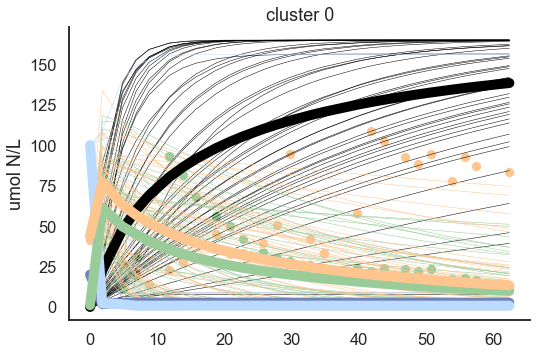

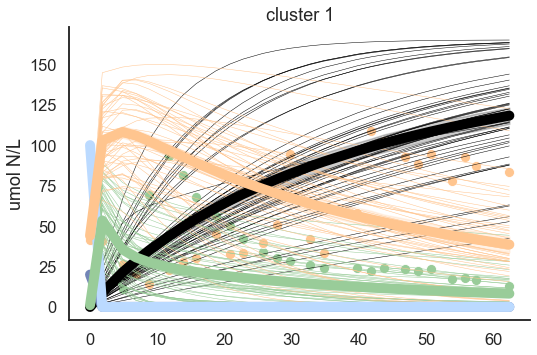

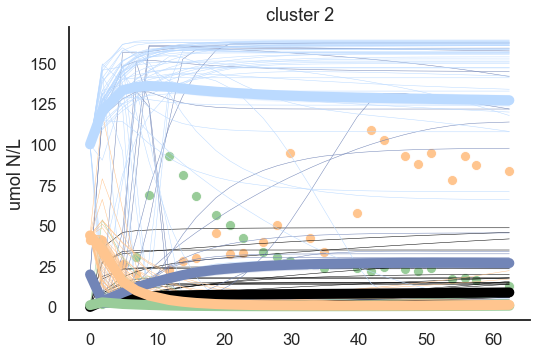

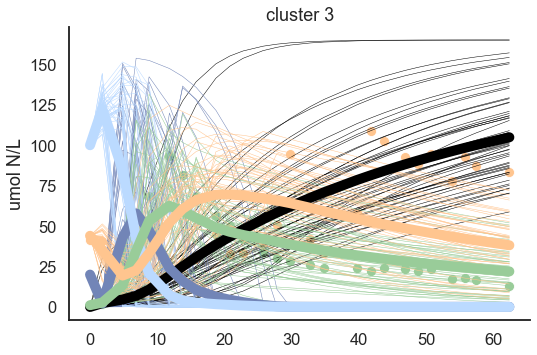

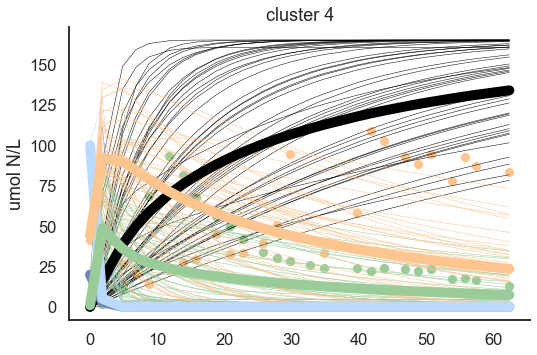

In [90]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

def pp2(data, **kwargs):
    print(data)
    sns.lineplot(
        x='day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
    )


for i in range(0,clusterer.labels_.max()+1):
    ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster==i, 'run_id'])
    tdf = mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(ids)]
    atdf = mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=10,
    )


    g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


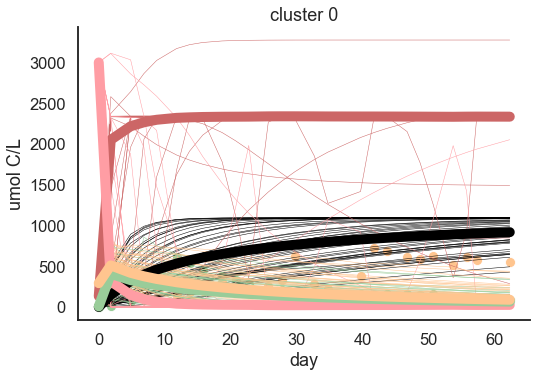

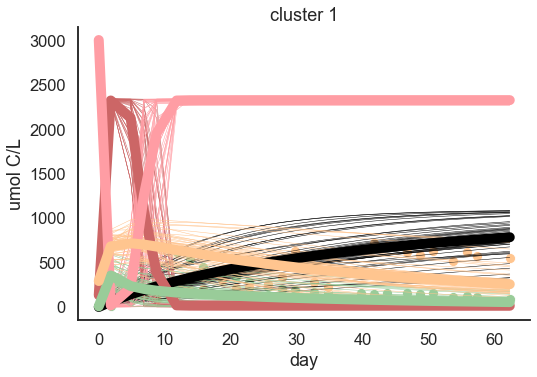

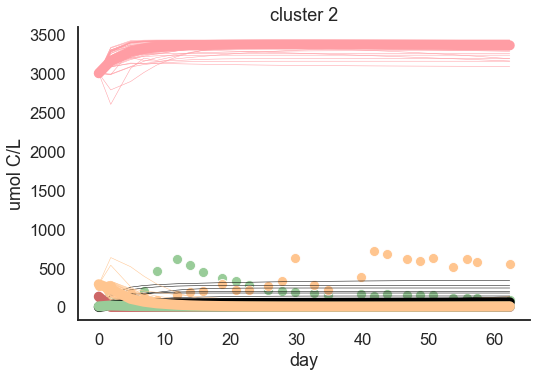

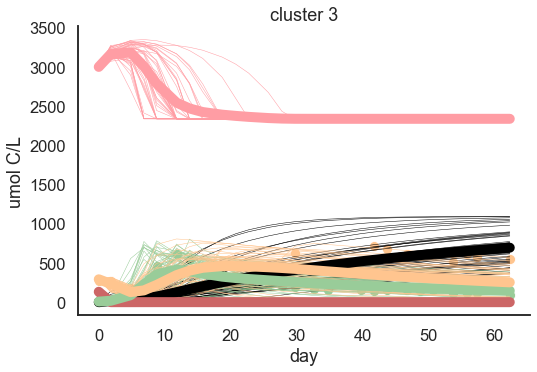

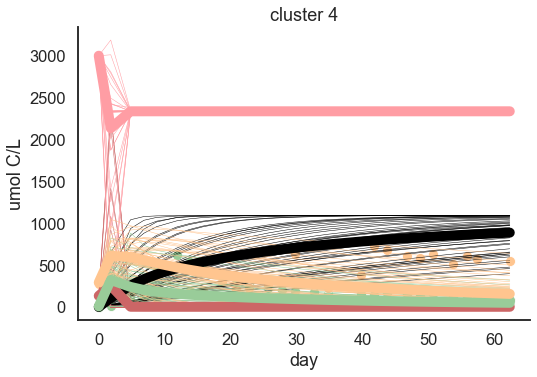

In [94]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)

def pp2(data, **kwargs):
    print(data)
    sns.lineplot(
        x='day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
    )


for i in range(0,clusterer.labels_.max()+1):
    ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster==i, 'run_id'])
    tdf = mdf.loc[mdf.variable.isin(cccorder) & mdf.run_id.isin(ids)]
    atdf = mdf.loc[mdf.variable.isin(cccorder) & mdf.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette, legend=False, lw=10,
    )


    g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol C/L', xlabel='day', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


In [54]:
udf.head()

,UMAP1,UMAP2,run_id,error,cluster
0,-1.407559,-5.732627,de_h-1000037321688616216,5600.855680,2
1,0.799372,-8.213336,de_h-1003234812744863186,5593.301768,2
2,6.527477,19.263016,de_h-1003600340430498967,5568.261242,4
3,12.035246,11.213881,de_h-1004700782046925531,5575.047546,0
4,11.153156,4.373990,de_h-1007391539205323316,3714.509563,0


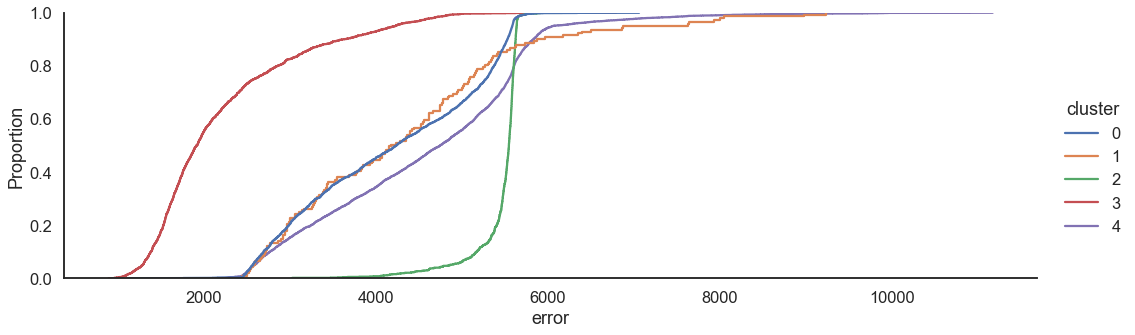

In [55]:
sns.displot(data=udf.loc[udf.cluster>=0], 
            x='error', hue='cluster', palette=cpalette[1:], aspect=3, kind='ecdf')

In [71]:
cols_to_lookat = ['M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 
       'E^O_p', 'E^I_h', 
       'Vmax^IN_p',  'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h',  'epsilon', 'VTmax', 'omega']

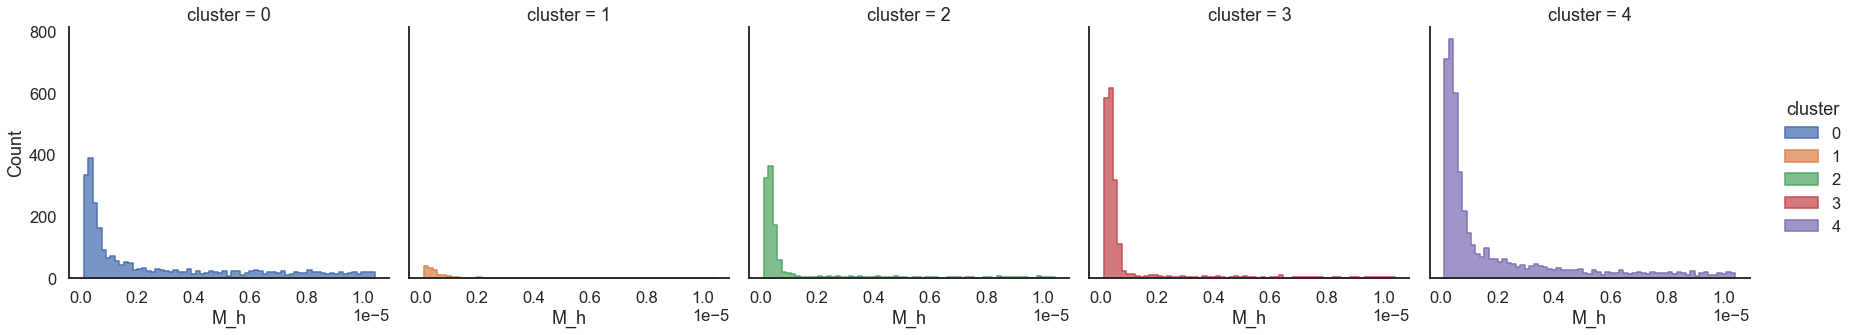

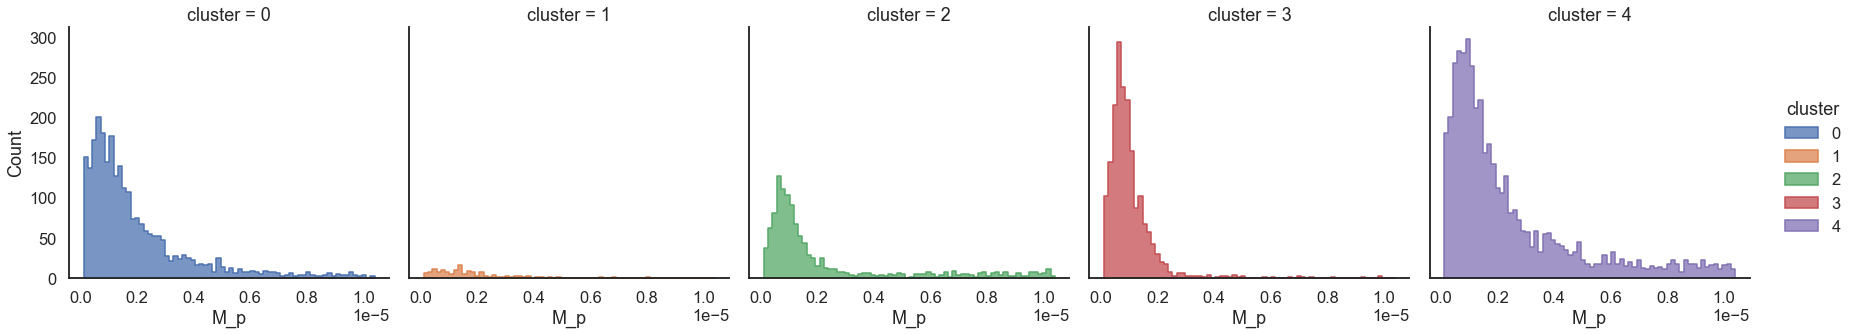

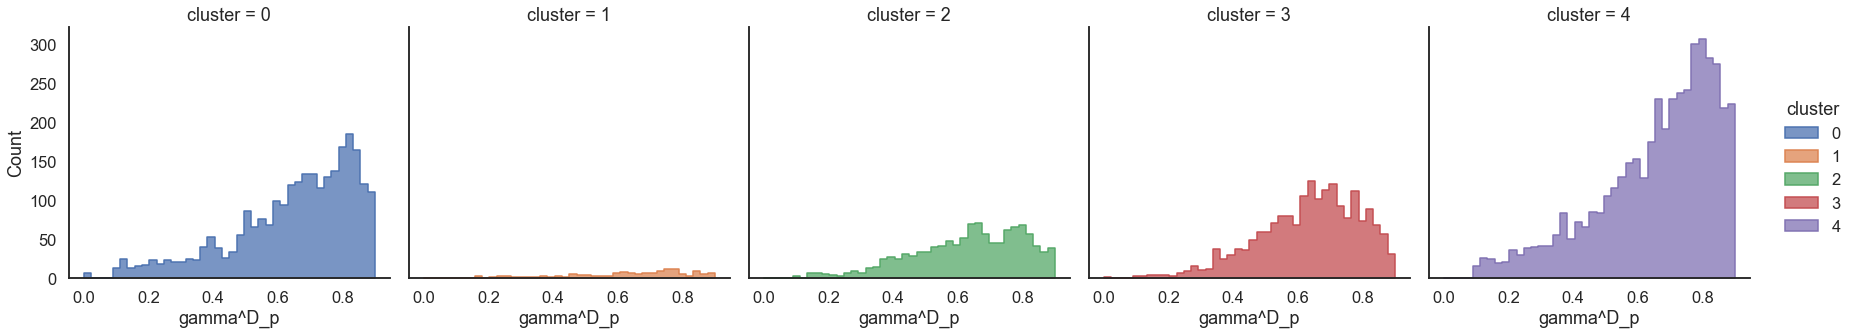

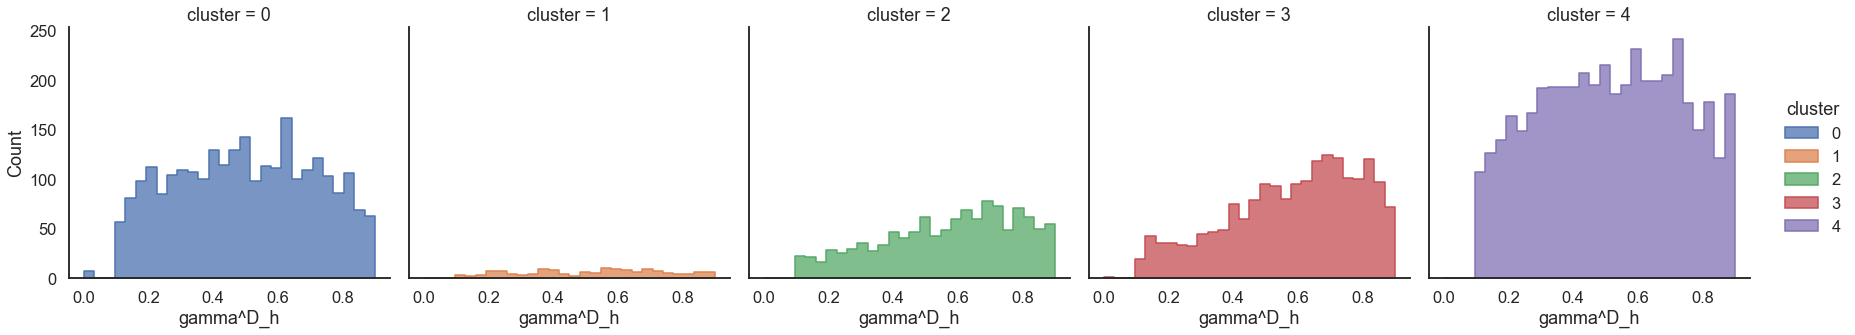

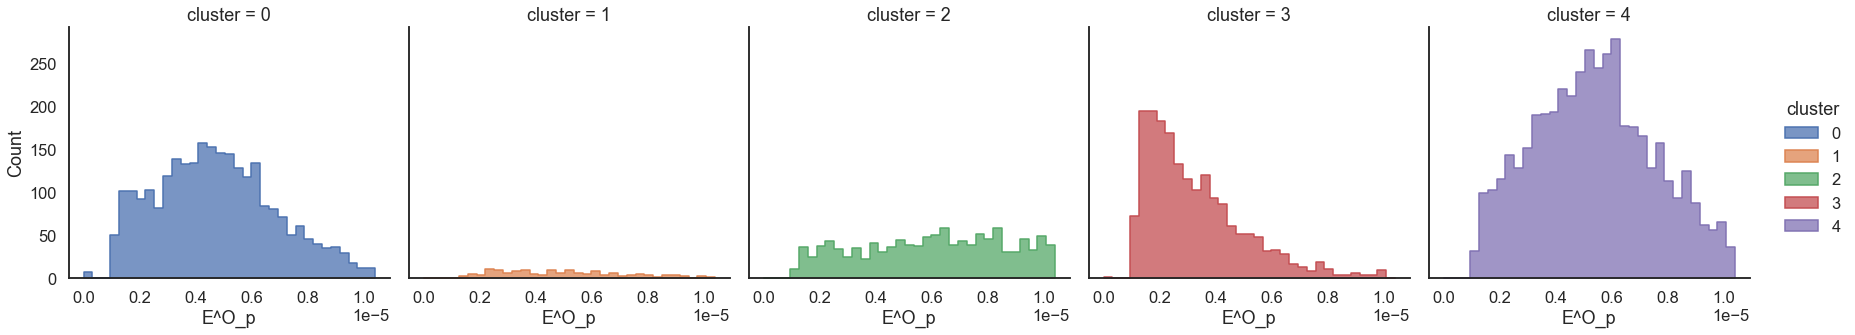

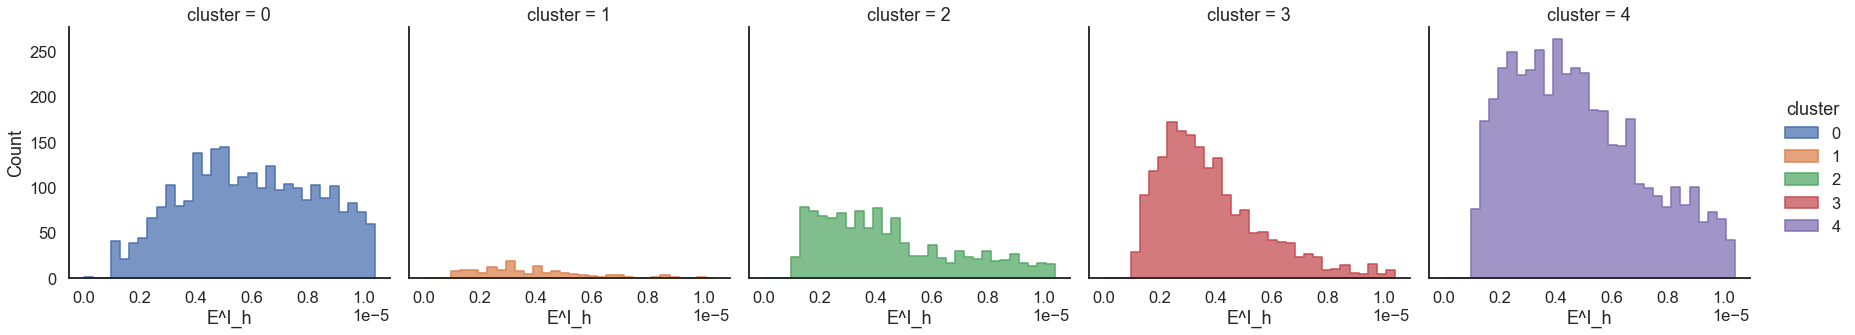

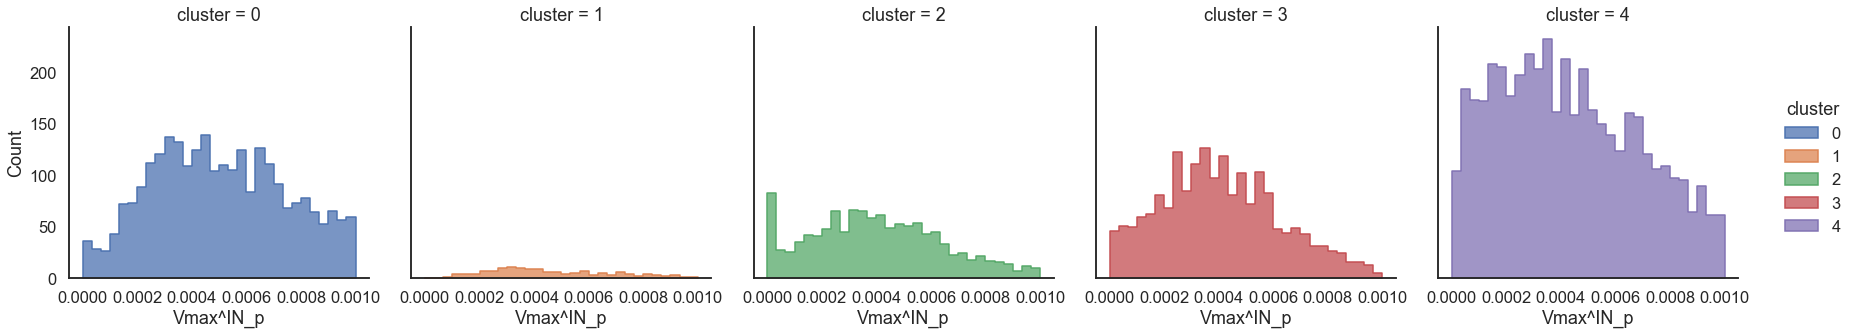

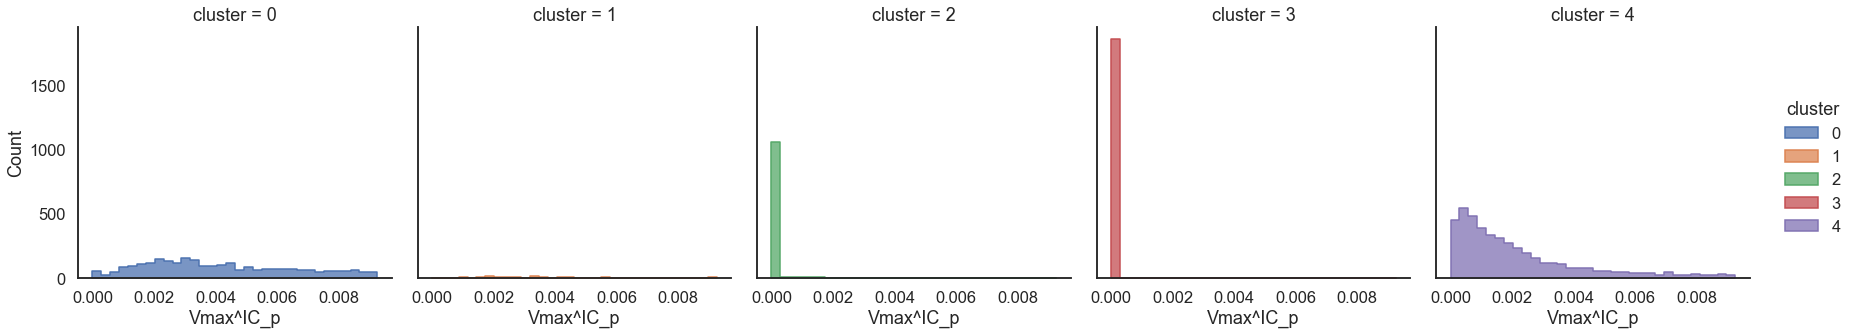

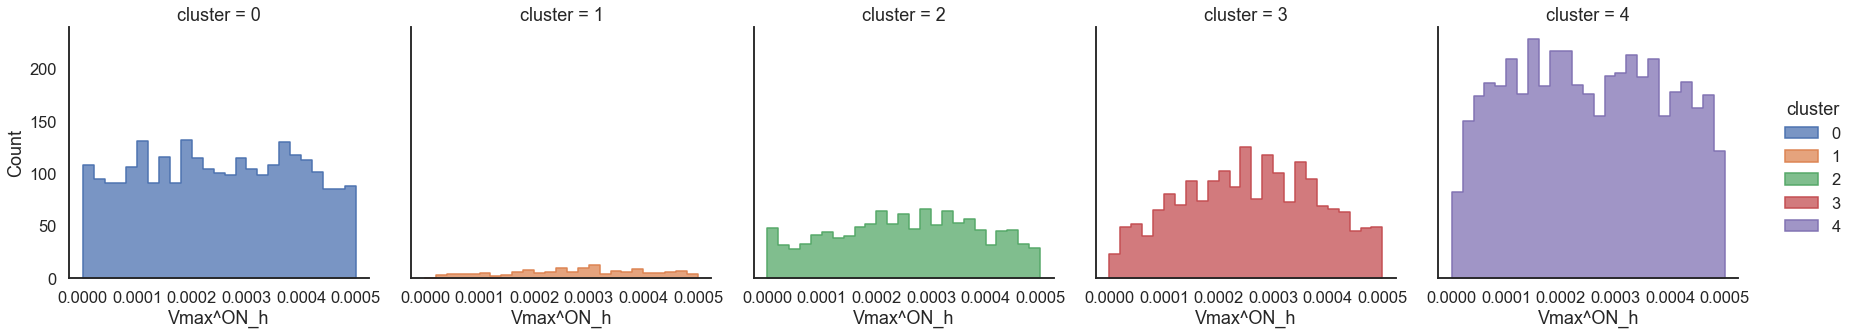

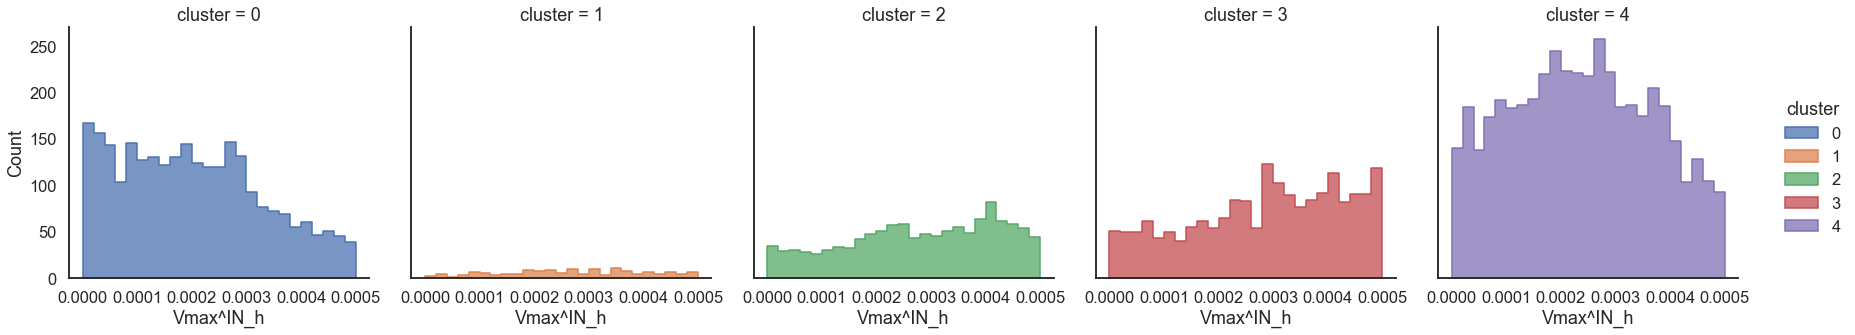

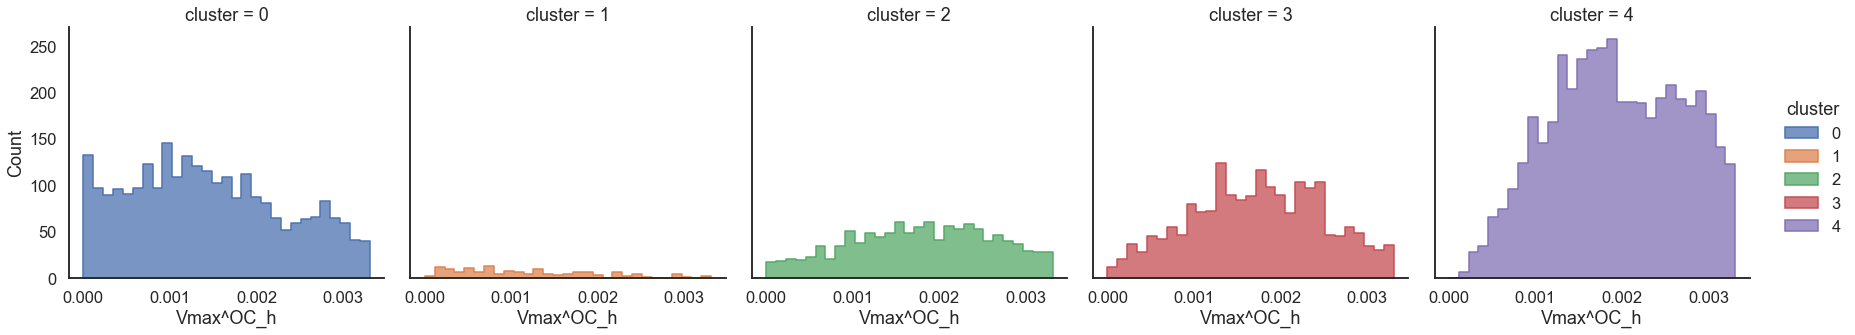

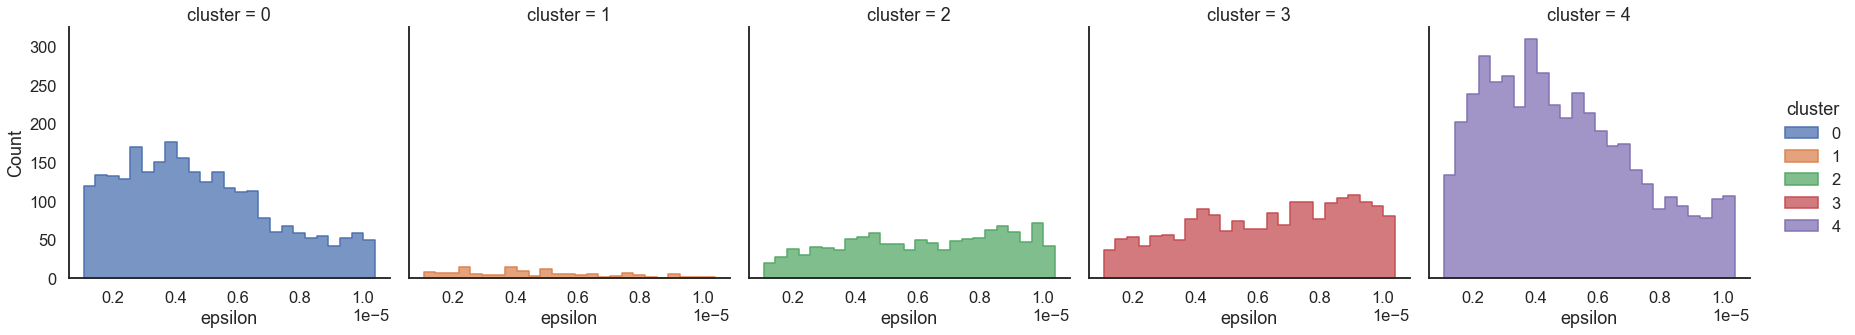

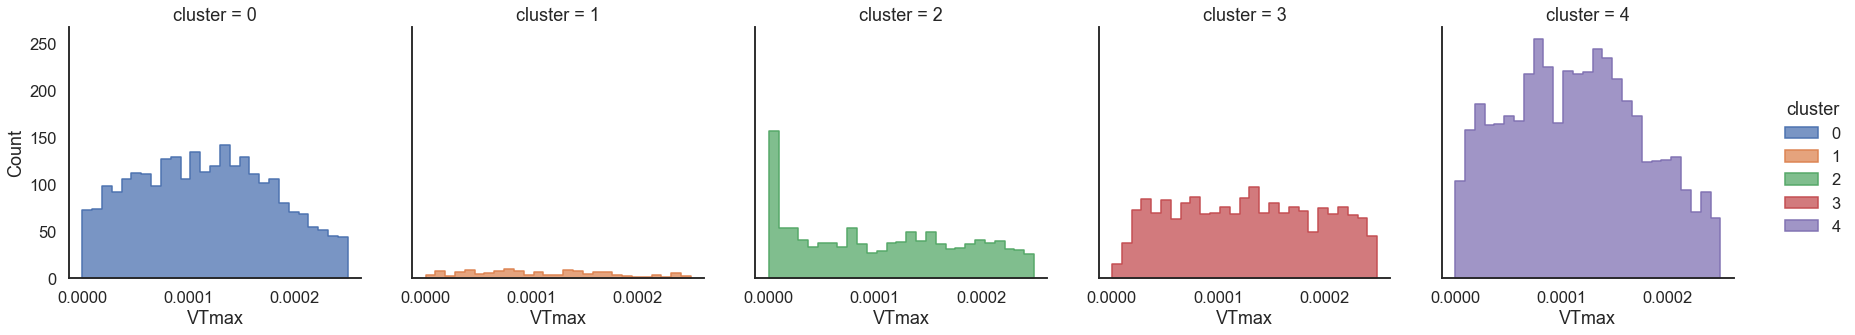

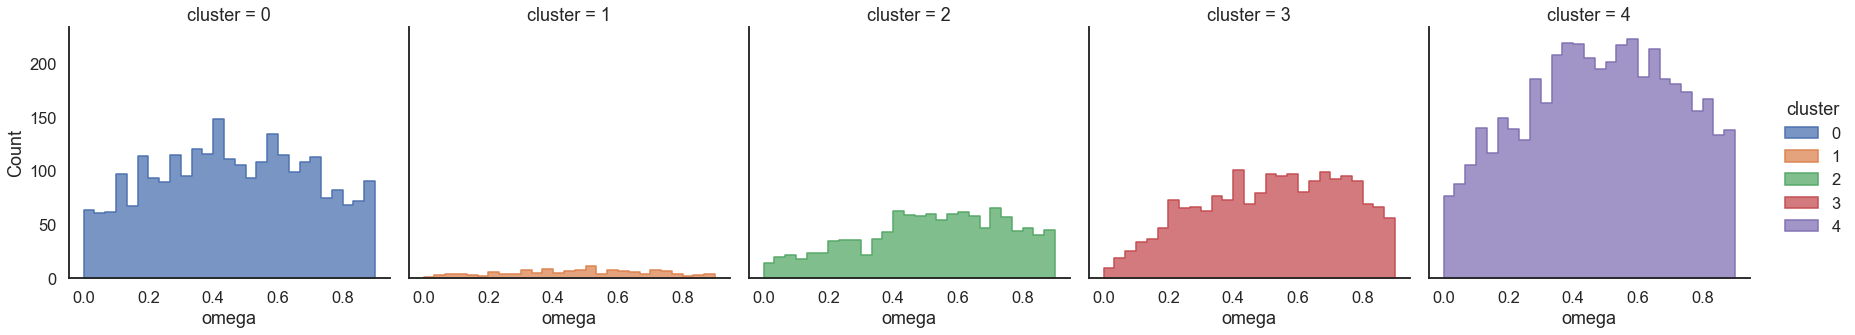

In [85]:
for c in cols_to_lookat:
    sns.displot(data=udf.loc[udf.cluster>=0], 
                x=c, hue='cluster', palette=cpalette[1:], kind='hist', element='step', multiple='stack', col='cluster' )

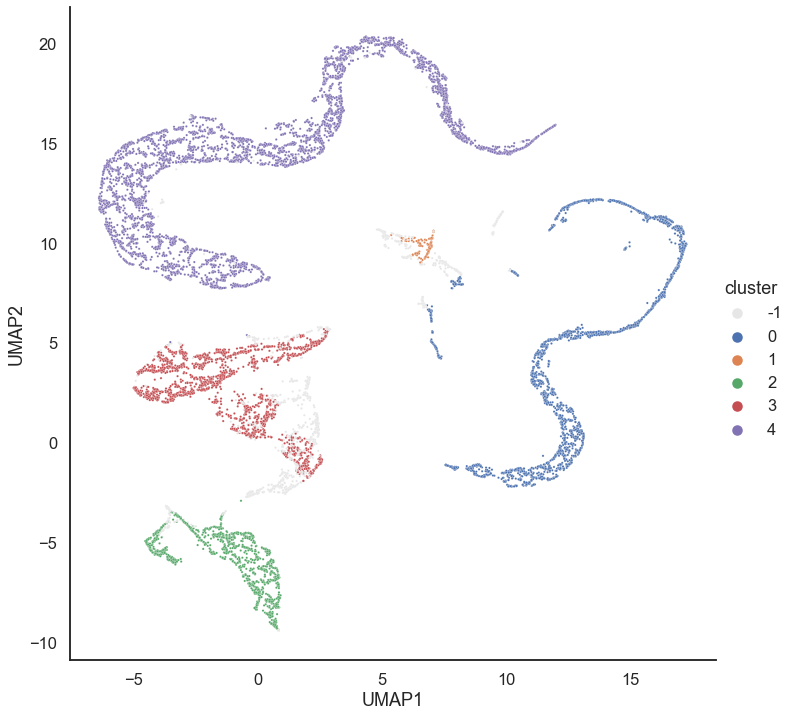

In [86]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')